<br>

### Итоговая работа 

<br>

In [1]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn
from sklearn.model_selection import train_test_split

<br>

#### 1. Загрузите файл HR.csv в pandas dataframe

<br>

In [2]:
df = pd.read_csv('HR.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

<br>

#### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

<br>

In [5]:
col_type = {
    'numerical' : [
        'satisfaction_level', 
        'last_evaluation', 
        'number_project', 
        'average_montly_hours', 
        'time_spend_company' 
    ],
    'categorical' : [
        'work_accident', 
        'left', 
        'promotion_last_5years' 
    ],
    'text' : [
        'department', 
        'salary' 
    ]
}

In [6]:
avg_dict = {}
for col in col_type['numerical']:
    #mean = round(df[col].mean(), 2)
    median = round(df[col].median(), 2)
    moda = df[col].round().mode().tolist()[0]
    avg_dict[col] = [median, moda]
df_avg = pd.DataFrame(avg_dict, index=['median', 'mode'])
df_avg = pd.concat([df[col_type['numerical']].describe().round(2), df_avg])

df_avg

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50
std,0.25,0.17,1.23,49.94,1.46
min,0.09,0.36,2.00,96.00,2.00
25%,0.44,0.56,3.00,156.00,3.00
50%,0.64,0.72,4.00,200.00,3.00
75%,0.82,0.87,5.00,245.00,4.00
max,1.00,1.00,7.00,310.00,10.00
median,0.64,0.72,4.00,200.00,3.00
mode,1.00,1.00,4.00,135.00,3.00


<br>

#### 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<br>

In [7]:
corr = df[col_type['numerical']].corr().round(2)
corr.round(2).style.background_gradient(cmap='RdYlGn')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.110000,-0.140000,-0.020000,-0.100000
last_evaluation,0.110000,1.000000,0.350000,0.340000,0.130000
number_project,-0.140000,0.350000,1.000000,0.420000,0.200000
average_montly_hours,-0.020000,0.340000,0.420000,1.000000,0.130000
time_spend_company,-0.100000,0.130000,0.200000,0.130000,1.000000


In [8]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10
last_evaluation,0.11,1.00,0.35,0.34,0.13
number_project,-0.14,0.35,1.00,0.42,0.20
average_montly_hours,-0.02,0.34,0.42,1.00,0.13
time_spend_company,-0.10,0.13,0.20,0.13,1.00


In [9]:
# Наибольшая корреляция наблюдается у этих двух переменных :
'number_project', 'average_montly_hours'

# Наименьшая корреляция наблюдается у этих двух переменных :
'satisfaction_level', 'average_montly_hours'

('satisfaction_level', 'average_montly_hours')

<br>

#### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

<br>

In [10]:
df.groupby(by=['department'], as_index=False) \
.agg({'satisfaction_level' : 'count'}) \
.rename(columns={'satisfaction_level' : 'число_сотрудников'})

,department,число_сотрудников
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


<br>

#### 5. Показать распределение сотрудников по зарплатам.

<br>

In [11]:
def draw_bar_chart(df, col_name):
    fig, ax = plt.subplots(figsize=(10, 7.5))

    df = pd.DataFrame(df[col_name].value_counts().reset_index())
    x = df[col_name]
    y = df['count']

    ax.bar(x, y)

    ax.set_ylabel(f'Кол-во человек')
    ax.set_xlabel(f'Уровень зарплаты')
    ax.set_title(f'Распределение числа сотрудников по уровню зарплаты')

    xx = x.unique().tolist()
    xx.sort()
    for i in range(df.shape[0]):
        plt.text(x[i], df.iloc[i, 1] + df['count'].max()*0.03, df.iloc[i, 1], 
                 horizontalalignment='center', verticalalignment='top')

    plt.xticks(np.arange(len(xx)), xx)

    plt.show()

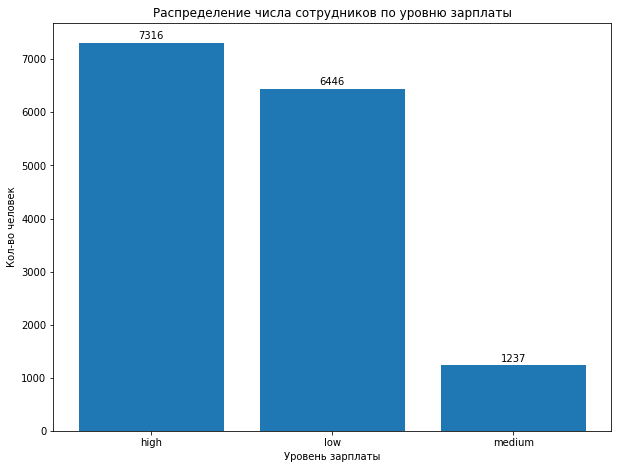

In [12]:
draw_bar_chart(df=df, col_name='salary')

<br>

#### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

<br>

In [13]:
def draw_compare_bar(feature_target, categories, targets):
    
    size = len(targets)+1

    x = np.arange(len(categories))  # the label locations
    width = 1/size  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(12, 8))

    for ft, target in feature_target.items():
        offset = width * multiplier
        plt.bar(x+offset, target, width, label=ft)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Кол-во человек')
    ax.set_xlabel('Департамент')
    ax.set_title(f'Распределение по уровню зарплат в разрезе департаментов')
    ax.legend(loc='upper left', title='Уровень зарплаты')

    max_list = list(feature_target.values())
    temp_list = max_list[0]
    for i in range(len(max_list) - 1):
        temp_list += max_list[i+1]
    max_val = max(temp_list) * 1.25

    ax.set_ylim(0, max_val)
    
    #ax.set_xticks(x + (size-2)/(2*size), categories)
    ax.set_xticks(ticks=(x + (size-2)/(2*size)), labels=categories)
                  #, labels=categories)

    plt.show()

In [14]:
feature = 'department'
target = 'salary'
feat_values = df[feature].unique().tolist()
targ_values = df[target].unique().tolist()

avgs_dict = {}
for x in targ_values:
    salary_unique = df.loc[df[target] == x][feature].unique().tolist()
    sal_list = []
    for y in feat_values:
        z = df.loc[(df[feature] == y) & (df[target] == x)].count()[0]
        sal_list.append(z)
    avgs_dict[x] = sal_list

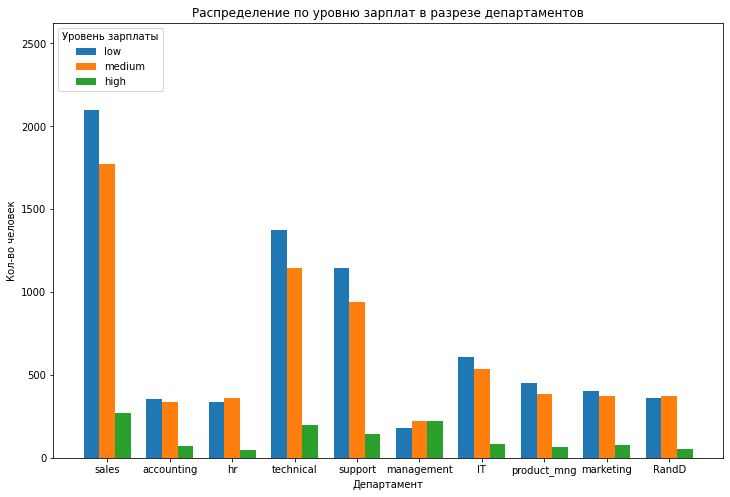

In [15]:
draw_compare_bar(avgs_dict, feat_values, targ_values)

<br>

#### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

<br>

Перед проверкой гипотезы для начала посмотрим на распределение среднего проведенного на работе времени 
в зависимости от оклада

In [16]:
high_df = df.loc[df['salary'] == 'high']['average_montly_hours']
low_df = df.loc[df['salary'] == 'low']['average_montly_hours']

In [17]:
# Функция для построения Гистограмм (для числовых данных)

def draw_hist(df, col_name, bins_num):
    fig, ax = plt.subplots(figsize=(10, 7.5))

    ax.hist(df.round(0), bins=bins_num)

    ax.set_ylabel(f'Кол-во записей')
    ax.set_xlabel(f'average_montly_hours')
    ax.set_title(f'Распределение объема работников по часам работы для {col_name} уровня зп')
    plt.tick_params(axis='x', rotation=30)
    ax.grid(axis='y')

    plt.show()

In [18]:
# Используем тест Шапиро-Уилка для проверки распределения данных на нормальность
# (и для наглядности также будем строить график):

def check_normality(df, col_name, plot_graph=False, bins_num=50):

    sighificance = 0.05
    statistics, p_val = stats.shapiro(df)

    if (p_val < sighificance):
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально\n")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально\n")

    if (plot_graph):
        draw_hist(df=df, col_name=col_name, bins_num=bins_num)

Распределение по времени, проведенному на работе для сотрудников с высокой зарплатой: 
Отклоняем нулевую гипотезу >> Данные распределены не нормально



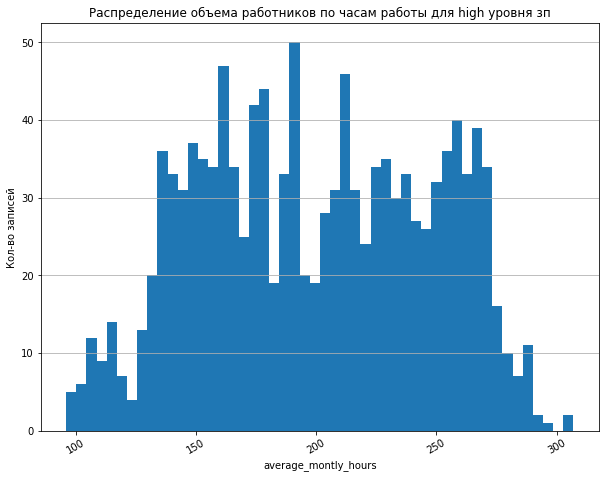

Распределение по времени, проведенному на работе для сотрудников с низкой зарплатой: 
Отклоняем нулевую гипотезу >> Данные распределены не нормально



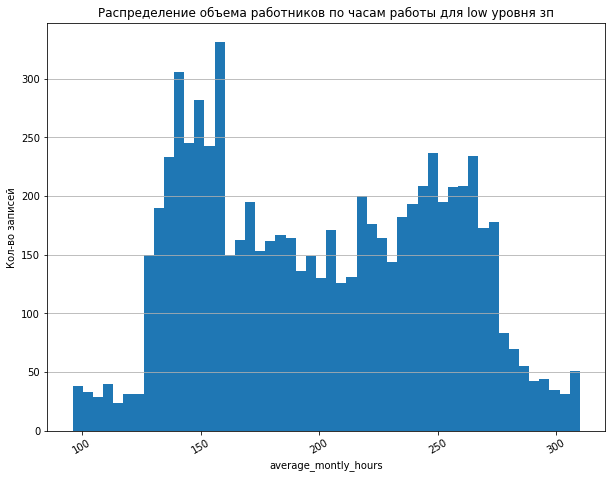

In [19]:
print('Распределение по времени, проведенному на работе для сотрудников с высокой зарплатой: ')
check_normality(df=high_df, col_name='high', plot_graph=True, bins_num=50)

print('Распределение по времени, проведенному на работе для сотрудников с низкой зарплатой: ')
check_normality(df=low_df, col_name='low', plot_graph=True, bins_num=50)

In [20]:
# С помощью теста Бартлетта сравним диспесии наших двух групп:

statistics, p = stats.bartlett(high_df, low_df)
alpha = 0.05

print(f'Статистика = {statistics}, p-value = {p}')

if p > alpha:
    print('Дисперсии групп примерно равны')
else:
    print('Дисперсии групп не равны')

Статистика = 8.240312901508515, p-value = 0.004097006889615195
Дисперсии групп не равны


Поскольку данные в обоих выборках распределены не нормально, и дисперсси двух групп не равны, то для проверки гипотез воспользуемся тестом Крускала-Уоллиса.

Условия применения теста Крускала-Уоллиса:
1. Порядковая или непрерывная переменная отклика — переменная отклика должна быть порядковой или непрерывной переменной.

    Это предположение выполняется

2. Независимость – наблюдения в каждой группе должны быть независимыми друг от друга.

    Это предположение выполняется.

3. Распределения имеют сходную форму — распределения в каждой группе должны иметь одинаковую форму.

    Судя по гистограммам выше, обе группы имеют похожую форму распределения значений. Это предположение выполняется.

In [21]:
# Тест Крускала-Уоллиса

# H0 - разница между среднемесячным кол-вом часов, проведенных на работе, не отличается 
# для сотрудников с высокой и низкой зарплатой
# H0 - разница между среднемесячным кол-вом часов, проведенных на работе, отличается 
# для сотрудников с высокой и низкой зарплатой

statistics, p = stats.kruskal(high_df, low_df)
alpha = 0.05

print(f'Статистика = {statistics}, p-value = {p}')

if p > alpha:
    print('Количество проведенных на работе часов не зависит от уровня зарплаты')
else:
    print('Количество проведенных на работе часов зависит от уровня зарплаты')

Статистика = 0.04938995008074725, p-value = 0.8241282261403291
Количество проведенных на работе часов не зависит от уровня зарплаты


Выводы:

По итогу проверки гипотезы получили, что среднее количество часов, проведенных на работе за месяц, статистически значимо не различается между сотрудниками с высоким окладом и сотрудниками с низким окладом.

<br>

#### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

<br>

In [22]:
left = df.loc[df['left'] == 1]
stayed = df.loc[df['left'] == 0]

In [23]:
stayed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [24]:
for series, kind in zip([left, stayed], ['Уволившиеся', 'Не уволившиеся']):
    raised_perc = round(100 * series['promotion_last_5years'].sum()/series['promotion_last_5years'].count(), 2)
    satisfaction = round(series['satisfaction_level'].mean(), 2)
    projects = round(series['number_project'].mean(), 2)
    print(f'{kind} сотрудники:')
    print(f'Доля сотрудников с повышением за последние 5 лет : {raised_perc}%')
    print(f'Средняя степень удовлетворенности : {satisfaction}')
    print(f'Среднее количество проектов: {projects}')
    print('--------------------------------------------------------\n')

Уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет : 0.53%
Средняя степень удовлетворенности : 0.44
Среднее количество проектов: 3.86
--------------------------------------------------------

Не уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет : 2.63%
Средняя степень удовлетворенности : 0.67
Среднее количество проектов: 3.79
--------------------------------------------------------



<br>

#### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

<br>

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [26]:
# Приступим к построению модели линейной регрессии:

X = df[['satisfaction_level', 
        'last_evaluation', 
        'number_project', 
        'average_montly_hours', 
        'time_spend_company', 
        'work_accident',
        'promotion_last_5years']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [27]:
# Посмотрим на метрику accuracy, хотя в данном случае она не будет полноценно репрезентативной
# из-за дисбаланса классов

print('Соотношения классов:')
print(df['left'].value_counts())
print('')
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision :', round(precision_score(y_test, y_pred), 4))
print('Recall :', round(recall_score(y_test, y_pred), 4))
print('F1-score :', round(f1_score(y_test, y_pred), 4))

Соотношения классов:
left
0    11428
1     3571
Name: count, dtype: int64

Accuracy : 0.7536
Precision : 0.4712
Recall : 0.2464
F1-score : 0.3236


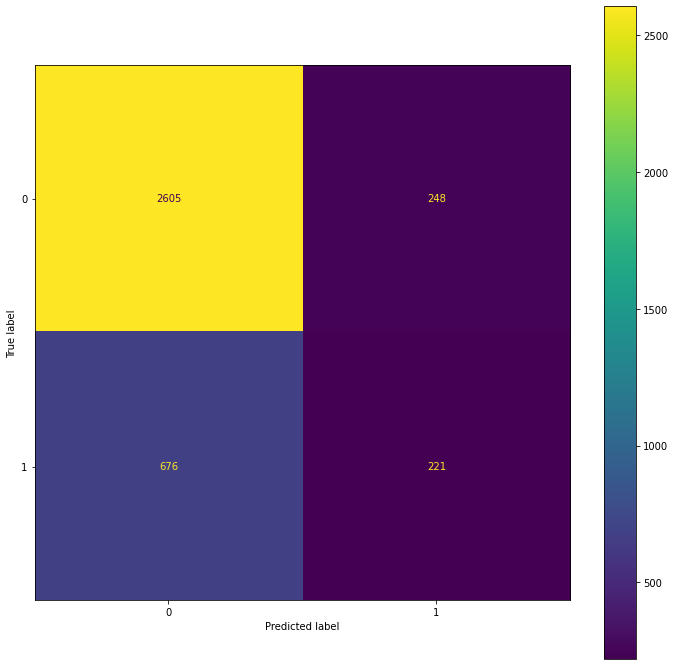

In [28]:
# Посмотрим на confusion matrix:

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()